# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [23]:
# Import libraries
import numpy as np
import pandas as pd

In [24]:
# Importing the dataset

pokemon = pd.read_csv('Pokemon.csv')
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [ ]:
# your code here

# we are going to assume from the data that we are assume that only 6 fields will get us the good pokemon

poke_clean = pokemon.drop(['Type 1', 'Type 2', 'Legendary', 'Generation'], axis=1)
def cleaner (x:str):
    x=x.replace(" ","_")
    x=x.replace("/", "_")
    return x.lower()
poke_clean.columns = list(map(cleaner, poke_clean.columns))
display(poke_clean.dtypes)
poke_clean

In [ ]:
poke_clean_num = poke_clean.drop(['name', '#'],axis=1)
# dropping the nam for the numerical values
poke_clean_num.isna().sum()
# compute the nan values in the numerical values
datapoke = pd.DataFrame(poke_clean_num)
datapoke
# display(poke_clean_num)



In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
sns.pairplot(poke_clean_num)

In [ ]:

correlations_matrix = poke_clean_num.corr()

display(correlations_matrix)
plt.figure(figsize = (12,7))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
poke_clean_num

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

y = poke_clean_num["total"]
X = poke_clean_num.drop(['total'], axis=1)

transformer = MinMaxScaler().fit(X)
poke_clean_norm = transformer.transform(X)
pd.DataFrame(poke_clean_norm, columns=X.columns)

# normalized_poke = pd.DataFrame(poke_clean_norm, columns=X.columns)
# normalized_poke

In [ ]:
norm_poke = pd.DataFrame(poke_clean_norm, columns=X.columns)
norm_poke

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


norm_poke_train, norm_poke_test, y_train, y_test = train_test_split(norm_poke, y, test_size=0.2, random_state=7)
lm = linear_model.LinearRegression()
lm.fit(norm_poke_train,y_train)

In [ ]:
predictions = lm.predict(norm_poke_train)
print(r2_score(y_train, predictions))

predictions_test = lm.predict(norm_poke_test)
print(r2_score(y_test, predictions_test))

In [ ]:
mse=mean_squared_error(y_test,predictions_test)
print(mse)

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print(rmse)

mae = mean_absolute_error(y_test, predictions_test)
print(mae)

In [ ]:
# the metrics of the predcition model are not satisfying, therfore we can use the code belw to infer that the 6 fields are linked to the total by their sum.

# pokemon["Total_Sum"] = pokemon.iloc[:,5:11].sum(axis=1) == pokemon["Total"]
# print(pokemon["Total_Sum"].value_counts())


total_df = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
display(total_df)

# pokemon['Total'].equals(total_df)
pokemon['Total']==total_df

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [ ]:
# your code here

pd.get_dummies

bestpokemon = pd.get_dummies(pokemon["Type 1"]) + pd.get_dummies(pokemon["Type 2"])
bestpokemon


In [33]:
type1 = pokemon[['Type 1']]
type2 = pokemon[['Type 2']]

from sklearn.preprocessing import OneHotEncoder

type1.columns = ['Type']

encoder = OneHotEncoder(handle_unknown = 'ignore').fit(type1)

encoded1 = encoder.transform(type1).toarray()

cols = encoder.get_feature_names(input_features = type1.columns)


def remove_char(name):
    return name.split('_')[1]

for i in range(len(cols)):
    cols[i] = remove_char(cols[i])

dfencoded1 = pd.DataFrame(encoded1, columns = cols)

encoded2 = encoder.transform(type2).toarray()

dfencoded2 = pd.DataFrame(encoded2, columns = cols)


for i in dfencoded2.columns:
    dfencoded1[i] = dfencoded1[i] + dfencoded2[i]

dfencoded1

c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Type 2
Feature names seen at fit time, yet now missing:
- Type

  warnings.warn(message, FutureWarning)


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Total
Bug,1.000000,-0.082062,-0.081200,-0.045111,-0.072148,-0.048645,-0.060536,0.064571,-0.058915,-0.034430,-0.063544,-0.070229,-0.120219,0.121210,-0.111968,-0.003706,0.047178,-0.123983,-0.145781
Dark,-0.082062,1.000000,-0.003963,-0.067375,-0.059864,-0.007791,-0.020368,-0.022164,0.001484,-0.048339,-0.023480,-0.010163,-0.099751,-0.018227,-0.044327,-0.033493,-0.023978,-0.028548,0.056154
Dragon,-0.081200,-0.003963,1.000000,-0.024000,-0.035541,-0.068775,-0.038069,0.026237,-0.019410,-0.078818,0.052430,0.015173,-0.098702,-0.055525,-0.026557,-0.032360,-0.044417,-0.083285,0.229705
Electric,-0.045111,-0.067375,-0.024000,1.000000,-0.035541,-0.068775,-0.057104,-0.020407,-0.041592,-0.078818,-0.059420,-0.033382,-0.067737,-0.074838,-0.091928,-0.072188,-0.001346,-0.069109,0.020971
Fairy,-0.072148,-0.059864,-0.035541,-0.035541,1.000000,-0.061108,-0.067651,-0.052669,-0.056665,-0.048756,-0.069360,-0.051232,-0.001720,-0.066495,0.027227,0.002212,0.013155,-0.067703,-0.036698
Fighting,-0.048645,-0.007791,-0.068775,-0.068775,-0.061108,1.000000,0.051130,-0.086119,-0.065792,-0.051171,-0.080531,-0.059483,-0.071687,-0.039613,0.000596,-0.055090,-0.005161,-0.073778,0.077786
Fire,-0.060536,-0.020368,-0.038069,-0.057104,-0.067651,0.051130,1.000000,-0.028855,-0.013459,-0.108248,-0.022621,-0.065851,-0.085097,-0.085471,-0.061243,-0.064677,-0.056108,-0.114850,0.078726
Flying,0.064571,-0.022164,0.026237,-0.020407,-0.052669,-0.086119,-0.028855,1.000000,-0.061555,-0.081366,-0.060578,-0.049498,0.125506,-0.067950,-0.063872,-0.048221,-0.081400,-0.092030,0.059383
Ghost,-0.058915,0.001484,-0.019410,-0.041592,-0.056665,-0.065792,-0.013459,-0.061555,1.000000,0.075316,-0.035908,-0.029914,-0.094420,0.008736,-0.070947,-0.069057,0.026479,-0.077314,0.003641
Grass,-0.034430,-0.048339,-0.078818,-0.078818,-0.048756,-0.051171,-0.108248,-0.081366,0.075316,1.000000,-0.097033,-0.027476,-0.117156,0.110372,-0.094009,-0.072829,-0.061537,-0.126894,-0.052592


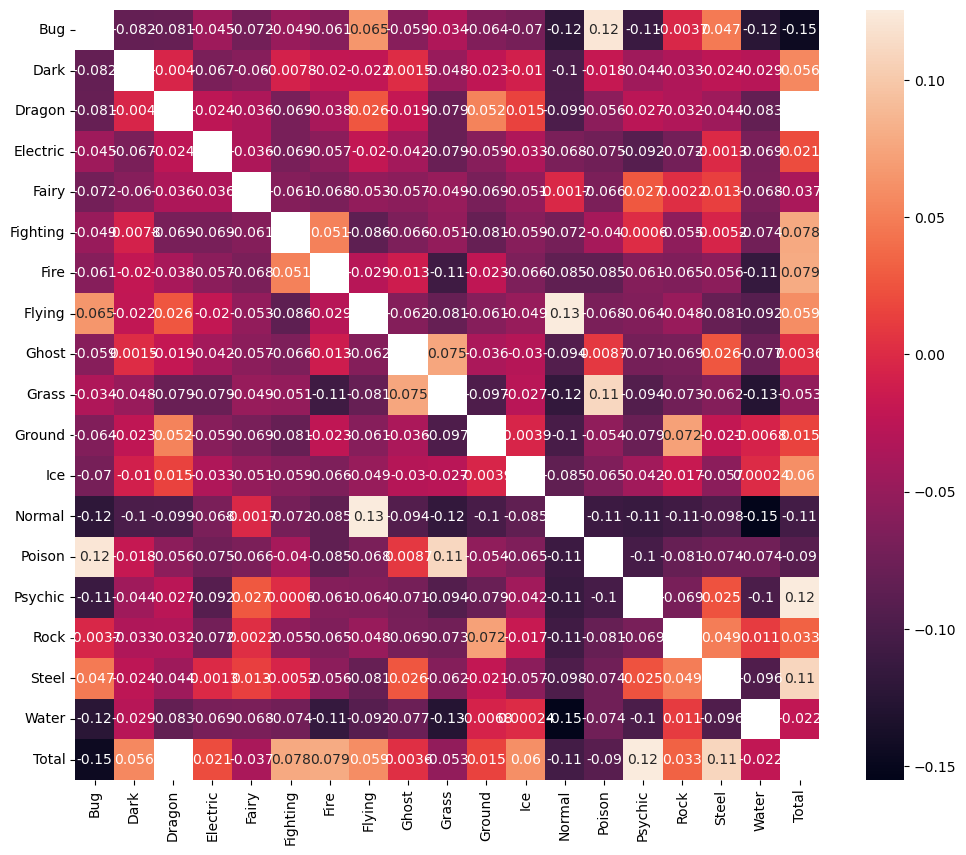

Total      1.000000
Dragon     0.229705
Psychic    0.124688
Steel      0.109703
Fire       0.078726
Name: Total, dtype: float64

In [46]:
# your code here
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

data = dfencoded1
data['Total'] = pokemon ['Total']

correlations_matrix = data.corr()

display(correlations_matrix)

plt.figure(figsize=(12,10))
sns.heatmap(correlations_matrix, annot = True,  mask = correlations_matrix > 0.2)
plt.show()

display(correlations_matrix.Total.sort_values(ascending = False).head())
# (np.abs(correlations_matrix) >= 0.2))

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [ ]:
# your code here
# the best Type would be Type 1 because of all the types , it is the most correlated to the total